# WeatherPy
----

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
import datetime

from scipy.stats import linregress
from datetime import datetime

# API key import
from key import wkey

# Citipy import to identify city based on lat and long
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [56]:
# Lists for storing lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and long combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1200)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, long combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is not already in cities list, then add it to list of cities
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

519

In [57]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={wkey}&units={units}&q="

In [58]:
lat = []
lng = []
city_names = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
responses = []

record_count = 1
set_count = 1

print("Beginning Data Retrieval")
print("------------------------")

for i, city in enumerate (cities, start = 1):
    
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        city_names.append(response['name'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        if record_count > 49:
            record_count = 1
            set_count = set_count + 1
        
        else:
            record_count = record_count + 1
        
        print(f"Processing Record {record_count} of Set {set_count} : {city}")
    
    except:
        print("City not found!")

Beginning Data Retrieval
------------------------
Processing Record 2 of Set 1 : atuona
Processing Record 3 of Set 1 : nanortalik
Processing Record 4 of Set 1 : havre-saint-pierre
Processing Record 5 of Set 1 : thompson
Processing Record 6 of Set 1 : lebu
Processing Record 7 of Set 1 : la ronge
Processing Record 8 of Set 1 : brigantine
Processing Record 9 of Set 1 : tiksi
Processing Record 10 of Set 1 : hirara
Processing Record 11 of Set 1 : marolambo
Processing Record 12 of Set 1 : smithers
Processing Record 13 of Set 1 : albany
Processing Record 14 of Set 1 : hithadhoo
Processing Record 15 of Set 1 : avarua
Processing Record 16 of Set 1 : hilo
Processing Record 17 of Set 1 : lahan
Processing Record 18 of Set 1 : hasaki
Processing Record 19 of Set 1 : ayan
Processing Record 20 of Set 1 : mar del plata
Processing Record 21 of Set 1 : nikolskoye
Processing Record 22 of Set 1 : rikitea
Processing Record 23 of Set 1 : ponta do sol
Processing Record 24 of Set 1 : east london
Processing Rec

Processing Record 42 of Set 4 : khatanga
Processing Record 43 of Set 4 : souillac
Processing Record 44 of Set 4 : trinidad
Processing Record 45 of Set 4 : oinacu
Processing Record 46 of Set 4 : san carlos de bariloche
Processing Record 47 of Set 4 : pangnirtung
City not found!
Processing Record 48 of Set 4 : oranjemund
Processing Record 49 of Set 4 : hamilton
Processing Record 50 of Set 4 : yenagoa
Processing Record 1 of Set 5 : jaen
Processing Record 2 of Set 5 : ketchikan
Processing Record 3 of Set 5 : eufaula
Processing Record 4 of Set 5 : carnarvon
Processing Record 5 of Set 5 : blackwater
Processing Record 6 of Set 5 : khuzhir
Processing Record 7 of Set 5 : port lincoln
Processing Record 8 of Set 5 : lasa
Processing Record 9 of Set 5 : aksha
Processing Record 10 of Set 5 : pishva
Processing Record 11 of Set 5 : lata
Processing Record 12 of Set 5 : ust-shonosha
Processing Record 13 of Set 5 : chernyshevskiy
Processing Record 14 of Set 5 : richards bay
Processing Record 15 of Set 5 

Processing Record 39 of Set 8 : maldonado
Processing Record 40 of Set 8 : kaabong
Processing Record 41 of Set 8 : bonfim
Processing Record 42 of Set 8 : zhigansk
City not found!
Processing Record 43 of Set 8 : young
Processing Record 44 of Set 8 : cockburn town
Processing Record 45 of Set 8 : lewistown
Processing Record 46 of Set 8 : leningradskiy
Processing Record 47 of Set 8 : rock springs
Processing Record 48 of Set 8 : rundu
Processing Record 49 of Set 8 : piedade
Processing Record 50 of Set 8 : asosa
Processing Record 1 of Set 9 : windsor
Processing Record 2 of Set 9 : buncrana
Processing Record 3 of Set 9 : huarmey
Processing Record 4 of Set 9 : ikom
Processing Record 5 of Set 9 : yarmouth
Processing Record 6 of Set 9 : chapais
Processing Record 7 of Set 9 : carutapera
Processing Record 8 of Set 9 : caravelas
City not found!
Processing Record 9 of Set 9 : namtsy
Processing Record 10 of Set 9 : tromso
Processing Record 11 of Set 9 : gigmoto
Processing Record 12 of Set 9 : jambalo


In [59]:
weather_dict = {
    "city": city_names,
    "lat": lat,
    "long": lng,
    "max temp": max_temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind speed": wind_speed,
    "country": country,
    "date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


,city,lat,long,max temp,humidity,cloudiness,wind speed,country,date
0,Atuona,-9.8000,-139.0333,77.11,77,8,16.80,PF,1609974797
1,Nanortalik,60.1432,-45.2371,31.37,89,100,7.83,GL,1609974797
2,Havre-St-Pierre,50.2334,-63.5986,35.60,51,90,11.41,CA,1609974797
3,Thompson,55.7435,-97.8558,19.40,100,90,6.78,CA,1609974797
4,Lebu,-37.6167,-73.6500,59.40,86,11,16.40,CL,1609974797


In [60]:
# Updates date format
timestamp = weather_data.iloc[0,8]
timestamp = datetime.fromtimestamp(timestamp).strftime('%m-%d-%y')

In [61]:
cities_output_file = os.path.join('..','output_data','cities.csv')

# Open the output file
with open(output_data_file, 'w') as datafile:
    weather_data.to_csv(output_data_file)

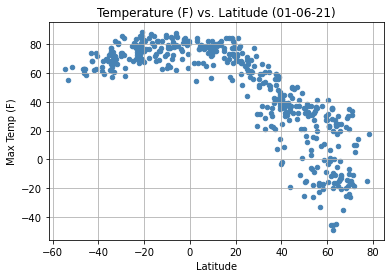

In [62]:
weather_data.plot(kind='scatter', x='lat', y='max temp', c='steelblue')
plt.title(f'Temperature (F) vs. Latitude ({timestamp})')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid()
plt.savefig("../output_data/MaxTemperatureVsLatitude.png")

The above scatter plot depicts the maximum temperature for each city identified and its corresponding latitude.

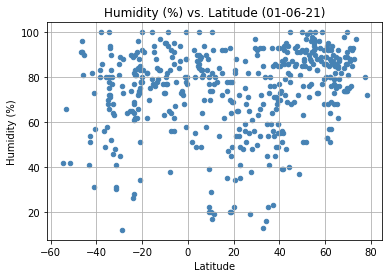

In [66]:
weather_data.plot(kind='scatter', x='lat', y='humidity', c='steelblue')
plt.title(f'Humidity (%) vs. Latitude ({timestamp})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../output_data/HumidityVsLatitude.png")

The above scatter plot depicts the humidity for each city identified and its corresponding latitude.

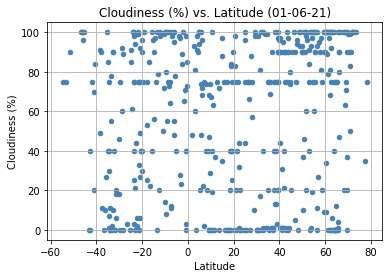

In [68]:
weather_data.plot(kind='scatter', x='lat', y='cloudiness', c='steelblue')
plt.title(f'Cloudiness (%) vs. Latitude ({timestamp})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../output_data/CloudinessVsLatitude.png")

The above scatter plot depicts the cloudiness for each city identified and its corresponding latitude.

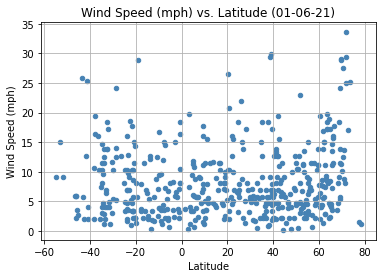

In [69]:
weather_data.plot(kind='scatter', x='lat', y='wind speed', c='steelblue')
plt.title(f'Wind Speed (mph) vs. Latitude ({timestamp})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../output_data/WindSpeedVsLatitude.png")

The above scatter plot depicts the wind speed for each city identified and its corresponding latitude.

In [70]:
northern_hemisphere_data = weather_data[weather_data["lat"] > 0]
southern_hemisphere_data = weather_data[weather_data["lat"] < 0]

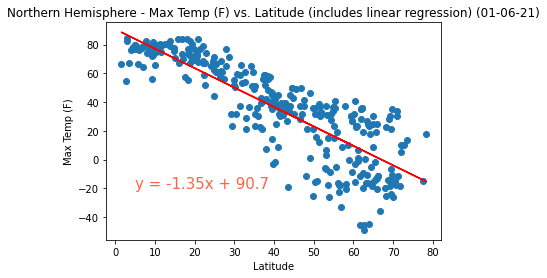

In [71]:
x_values = northern_hemisphere_data['lat']
y_values = northern_hemisphere_data['max temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-20),fontsize=15,color="tomato")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f'Northern Hemisphere - Max Temp (F) vs. Latitude (includes linear regression) ({timestamp})')
plt.show()

The above plot shows a strong negative linear relationship between city temperatures and their distance from the equator in the northern hemisphere.

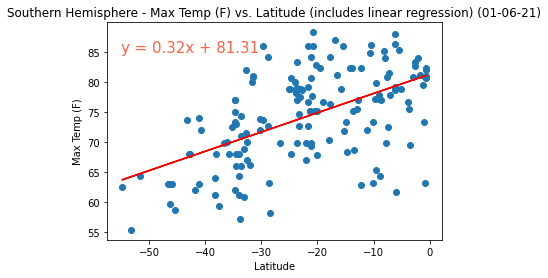

In [73]:
x_values = southern_hemisphere_data['lat']
y_values = southern_hemisphere_data['max temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="tomato")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f'Southern Hemisphere - Max Temp (F) vs. Latitude (includes linear regression) ({timestamp})')
plt.show()

The above plot shows a moderate positive linear relationship between city temperatures and their closeness to the equator in the southern hemisphere.

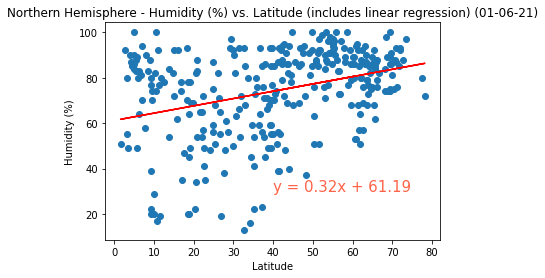

In [74]:
x_values = northern_hemisphere_data['lat']
y_values = northern_hemisphere_data['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="tomato")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude (includes linear regression) ({timestamp})')
plt.show()

The above plot shows a weak positive linear relationship between city humidity and their distance from the equator in the northern hemisphere.

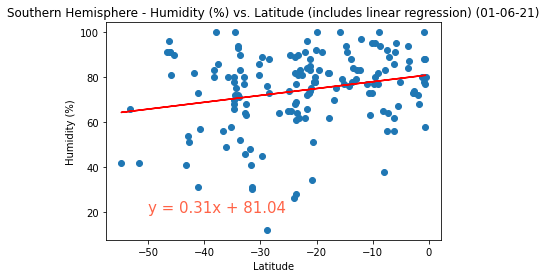

In [76]:
x_values = southern_hemisphere_data['lat']
y_values = southern_hemisphere_data['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="tomato")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude (includes linear regression) ({timestamp})')
plt.show()

The above plot shows a weak positive linear relationship between city humidity and their closeness to the equator in the southern hemisphere.

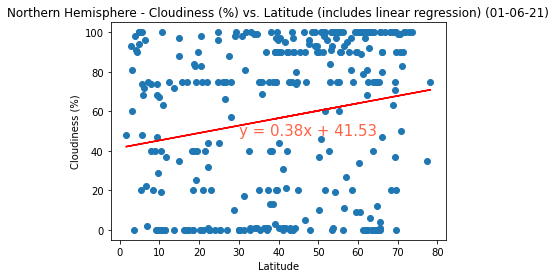

In [80]:
x_values = northern_hemisphere_data['lat']
y_values = northern_hemisphere_data['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,48),fontsize=15,color="tomato")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude (includes linear regression) ({timestamp})')
plt.show()

The above plot shows a weak positive linear relationship between city cloudiness and their distance from the equator in the northern hemisphere.

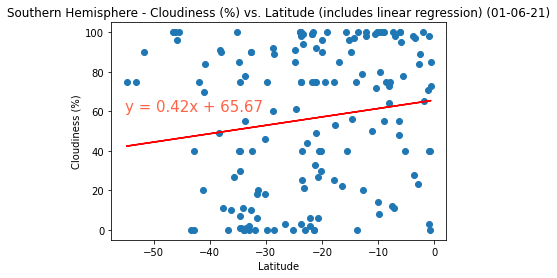

In [83]:
x_values = southern_hemisphere_data['lat']
y_values = southern_hemisphere_data['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="tomato")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude (includes linear regression) ({timestamp})')
plt.show()

The above plot shows a weak positive linear relationship between city cloudiness and their closeness to the equator in the southern hemisphere.

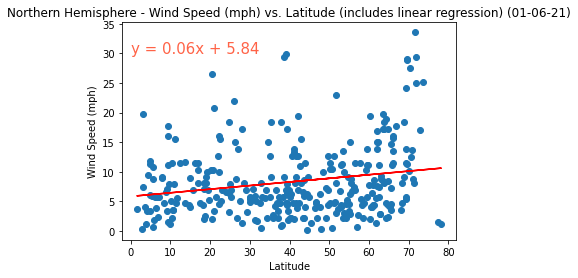

In [84]:
x_values = northern_hemisphere_data['lat']
y_values = northern_hemisphere_data['wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="tomato")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude (includes linear regression) ({timestamp})')
plt.show()

The above plot shows a moderate positive linear relationship between city wind speed and their distance from the equator in the northern hemisphere.

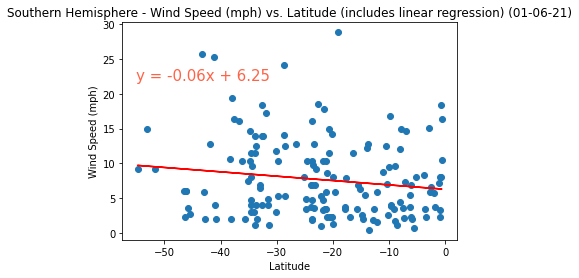

In [85]:
x_values = southern_hemisphere_data['lat']
y_values = southern_hemisphere_data['wind speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,22),fontsize=15,color="tomato")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude (includes linear regression) ({timestamp})')
plt.show()

The above plot shows a moderate negative linear relationship between city wind speed and their closeness to the equator in the southern hemisphere.